# Project Machine Learning


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df_train = pd.read_csv('C:/Users/Asus/Desktop/Machine_Learning_Project/input/train.csv')

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
##descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The minimum value of the price is greater than 0(min=34900). Good result since we don't have rows where the price of a house is 0. We shouldn't do analyzes to eliminate inconsistent values.

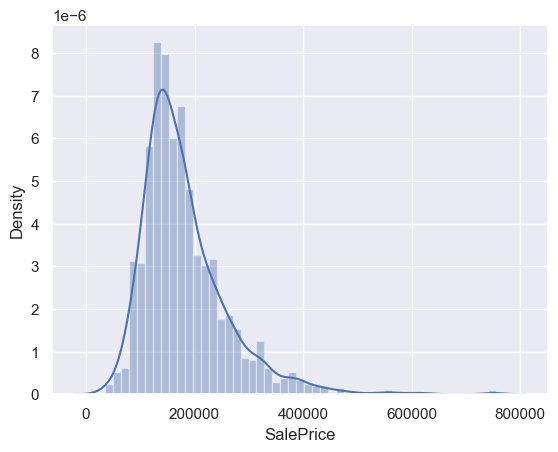

In [11]:
#histogram
sns.distplot(df_train['SalePrice']);

Distributions and plot the estimated PDF on the data.

Graph represents the estimated PDF on the data:
- We noticed that it is different from normal distribution
- Skewness is positive

In [12]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Relationship with numerical variables(below)

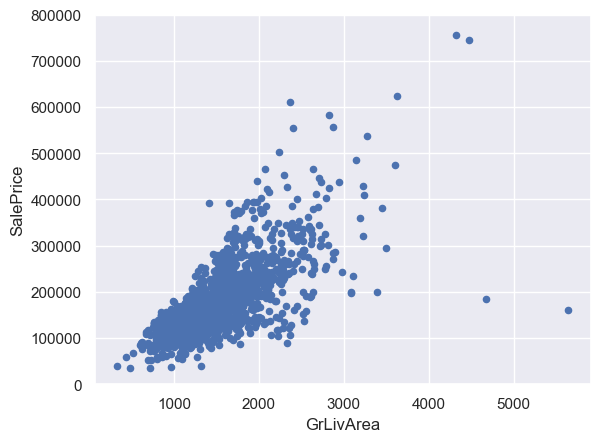

In [13]:
#scatter plot GrLivArea/SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

It seems that SalePrice and GrLivArea have a linear relationship.

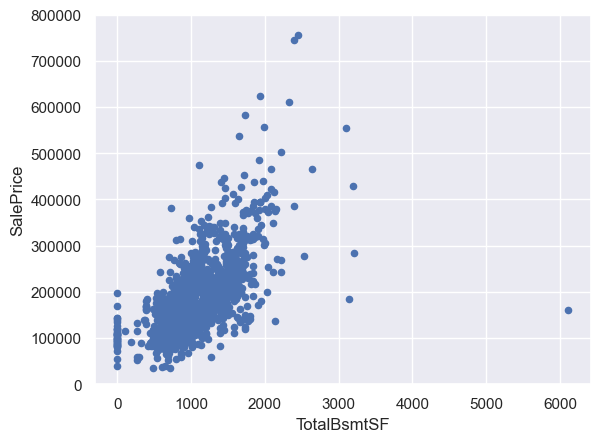

In [14]:
#scatter plot TotalBsmtSF/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

TotalBsmtSF has a linear relationship with SalePrice but this seems to be a much stronger relationship than before! it even looks like an exponential trend.

Relationship with categorical features(below). We have considered two categorial variables from data set: OverallQual and YearBuilt!!!

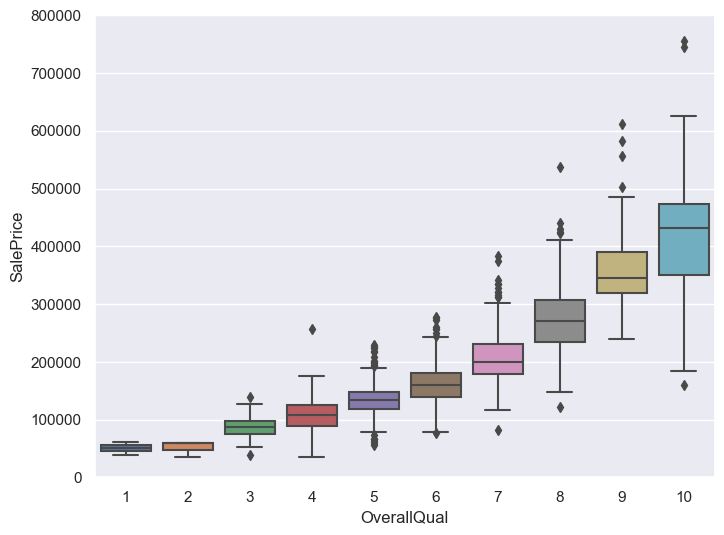

In [15]:
#box plot OverallQual/Saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Obviously, as was expected, as the general quality increases the price of the house also increases.

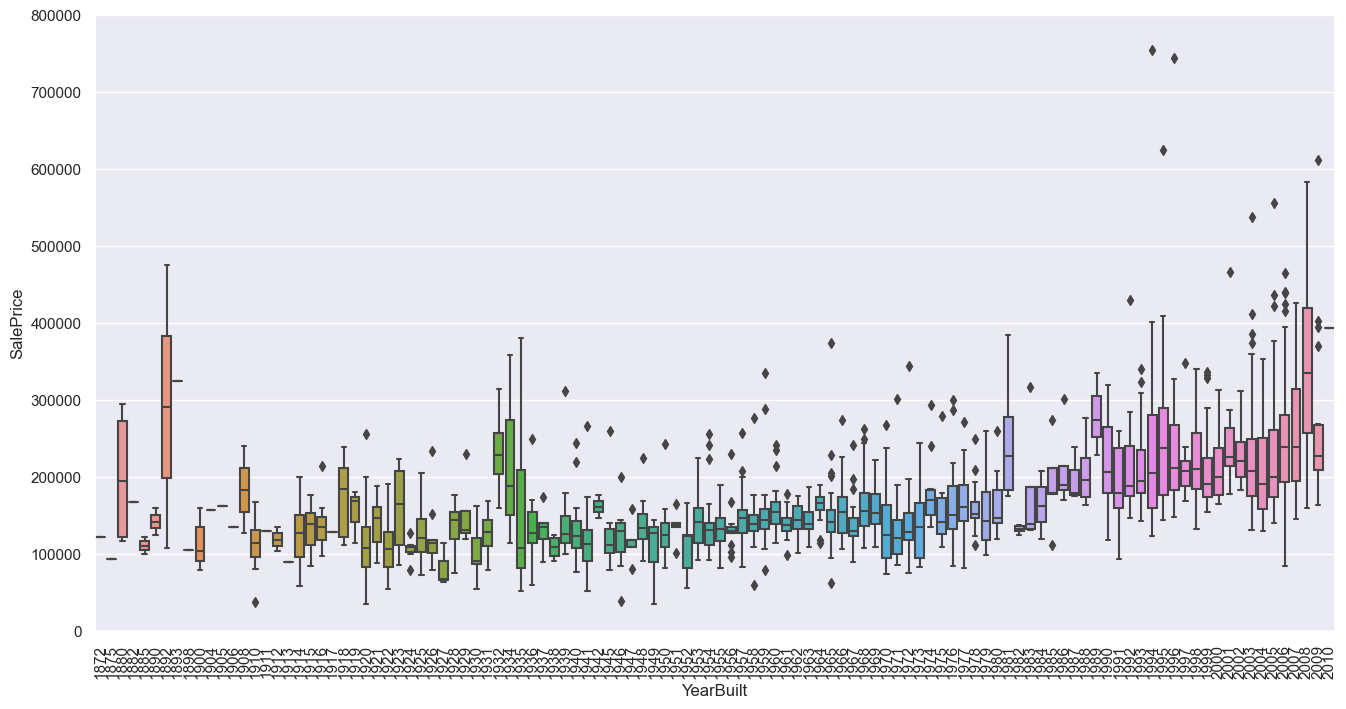

In [16]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

The box plot shows that there is a positive relationship between 'YearBuilt' and 'SalePrice', but the relationship is not as strong as the one observed between 'OverallQual' and 'SalePrice'. 

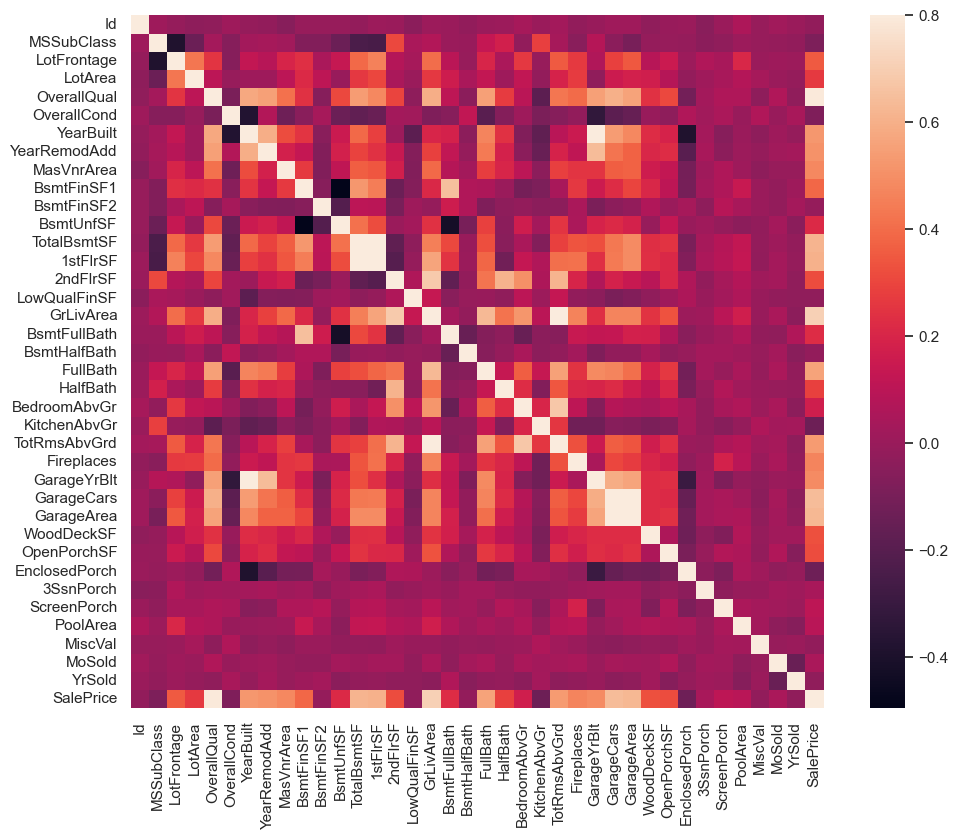

In [17]:
#Correlation matrix (heatmap style)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!'

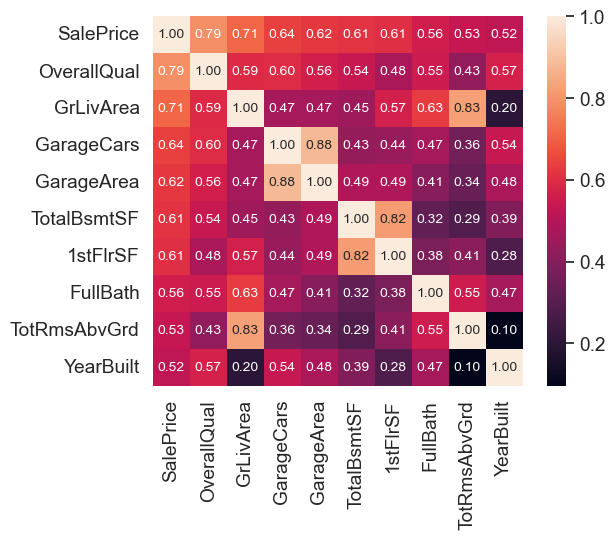

In [18]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our prediction, these are the variables most correlated with "SalePrice"

- "OverallQual", "GrLivArea" and "TotalBsmtSF" are strongly correlated with "SalePrice"

- "GarageCars" and "GarageArea" are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars entering the garage is a consequence of the garage area. "GarageCars" and "GarageArea" are like twin brothers. You will never be able to tell them apart. Therefore, we only need one of these variables in our analysis (we can keep "GarageCars" since its correlation with "SalePrice" is higher).

- "TotalBsmtSF" and "1stFloor" also appear to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.

- "YearBuilt" ... It seems that "YearBuilt" is slightly related to "SalePrice"

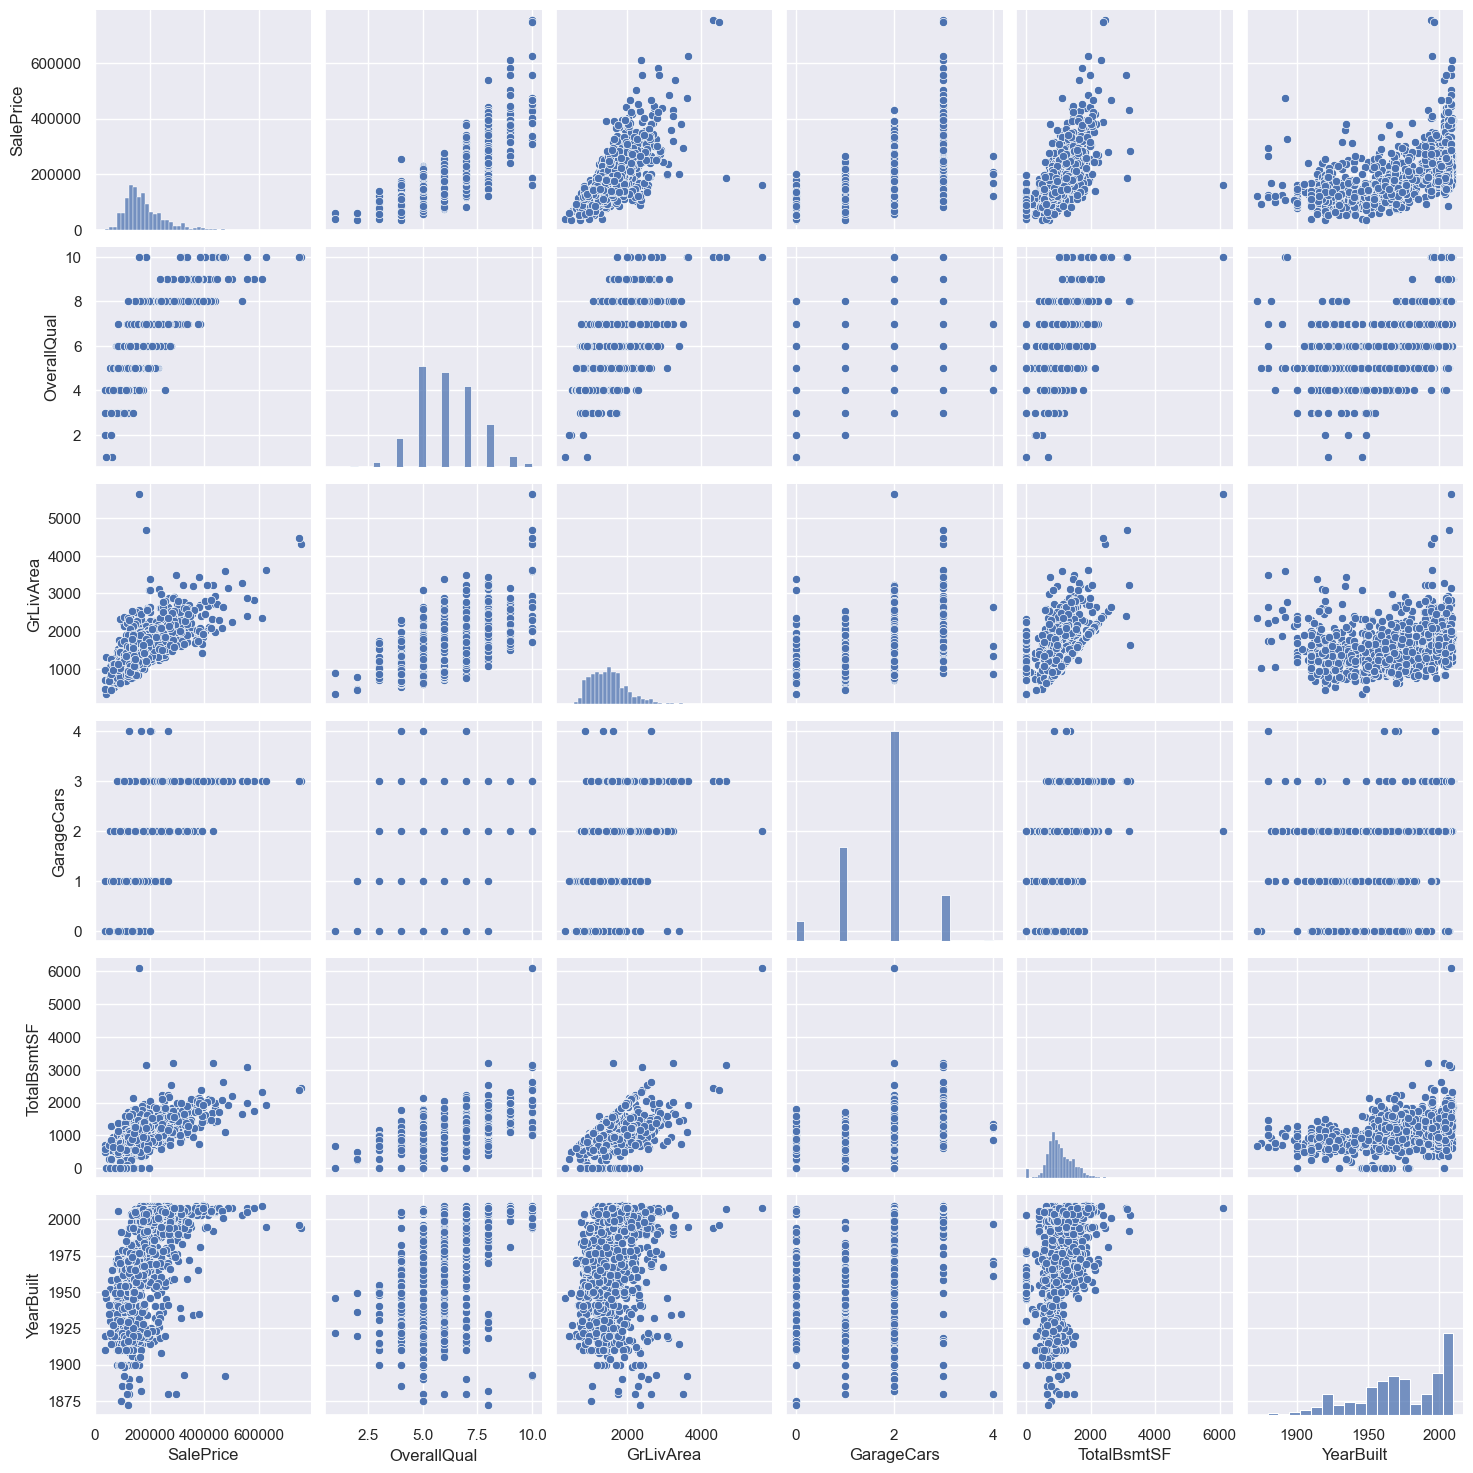

In [19]:
#scatterplot between SalePrice and correlated variables which we mentioned above!
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Important questions when thinking about missing data:

How prevalent is the missing data?
Is missing data random or does it have a pattern?
The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [20]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Let's analyze this to understand how to handle missing data.

We will consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we won't attempt any tricks to fill in the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I do not think so. None of these variables appear to be very important, as most of them are not aspects you think about when buying a house (maybe that's why the data is missing?).

Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.



In [21]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

Outliers are also something we should be aware of. Why? Because outliers can greatly affect our models and can be a valuable source of information, giving us insights into specific behaviors. Outliers is a complex topic and deserves more attention. Here we'll just do a quick analysis through the standard deviation of "SalePrice" and a series of scatterplots.

Univariate analysis

The primary concern here is establishing a threshold that defines an observation as an outlier. To do this, we will standardize the data. In this context, data standardization means converting data values ​​to have a mean of 0 and a standard deviation of 1.

In [22]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How 'SalePrice' looks:

•	Low range values are similar and not too far from 0.

•	High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.


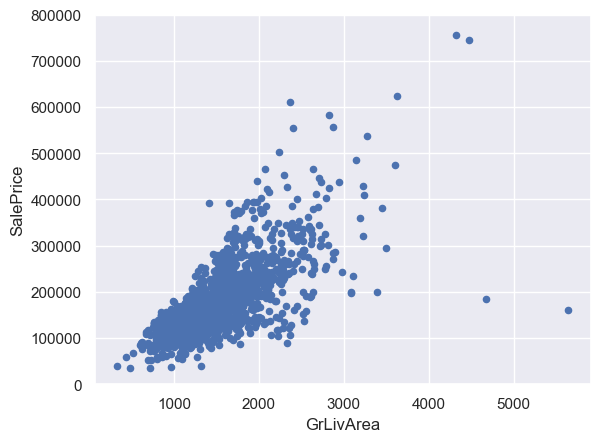

In [23]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

This scatter plot is showing the relationship between the 'GrLivArea' variable and the 'SalePrice' variable. From the plot, we can see that there is a positive linear relationship between the two variables. As the living area increases, the sale price of the house tends to increase as well. However, we can also see two outliers in the bottom right corner where the living area is large but the sale price is relatively low. These outliers could be interesting to investigate further.

In [24]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

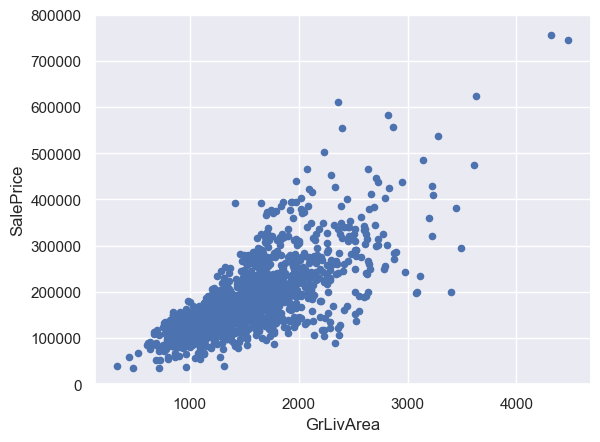

In [25]:
#bivariate analysis saleprice/grlivarea without OUTLIERS!!!
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

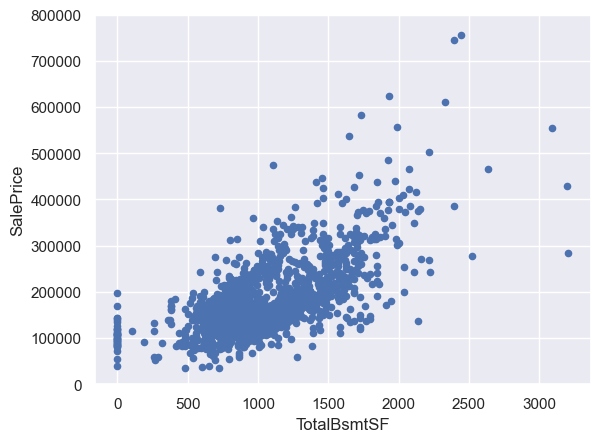

In [26]:
#bivariate analysis saleprice/totalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

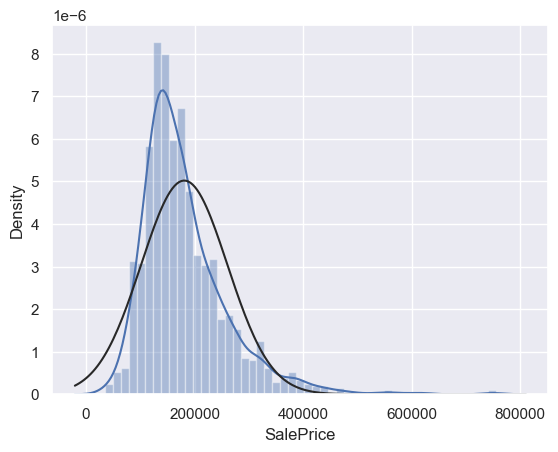

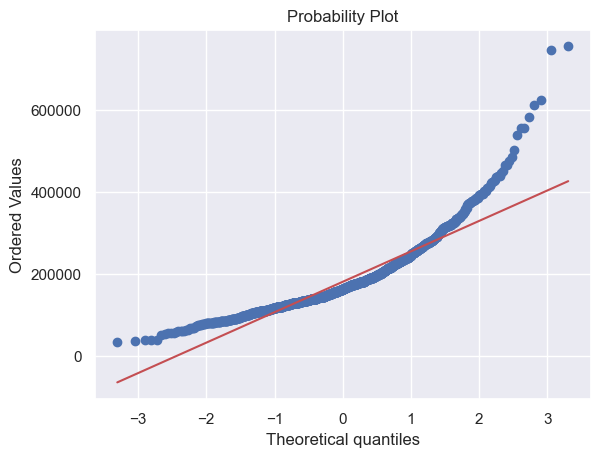

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. In case of positive skewness, log transformations usually works well.

In [28]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

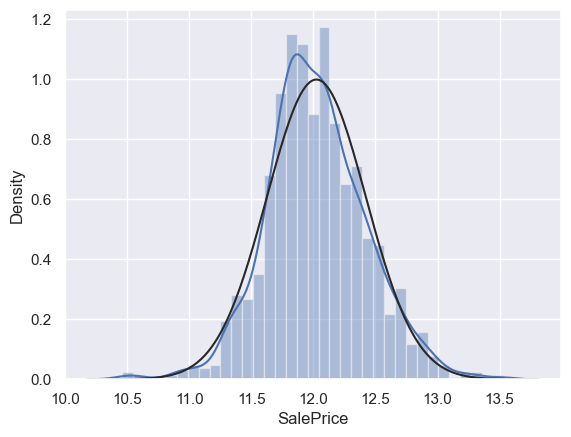

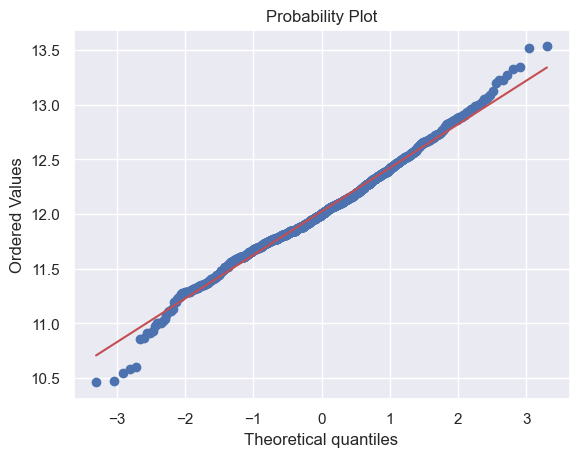

In [29]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Applying the log transformation to the target variable(‘SalePrice) has made it more normally distributed. The histogram looks smoother and the normal probability plot shows a more linear trend.

We did the job! Let's now check what is happening with "GrLivArea".

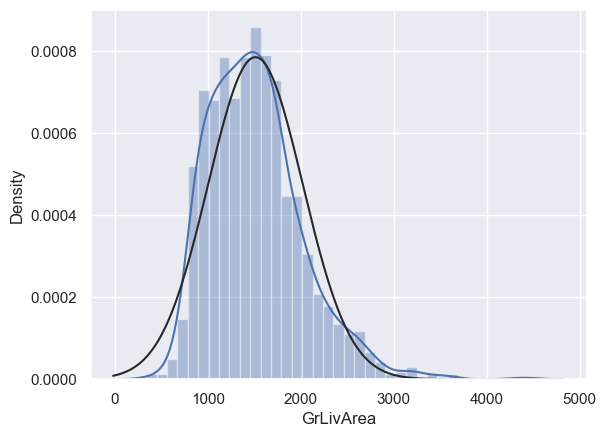

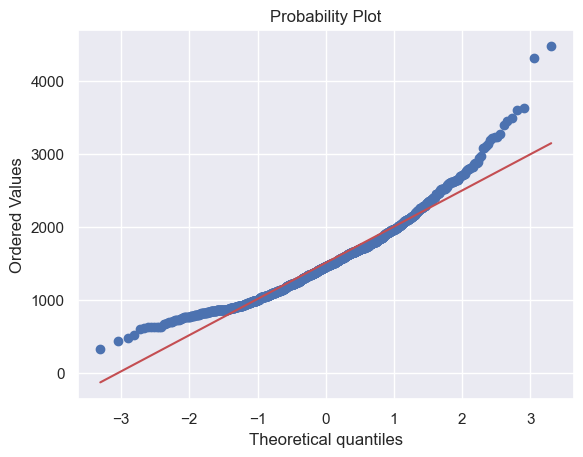

In [30]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

And in the case of the variable ‘GrLivArea’ we have positive skewness, so we will apply log               transformation like in the case of ‘SalePrice’.

In [31]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

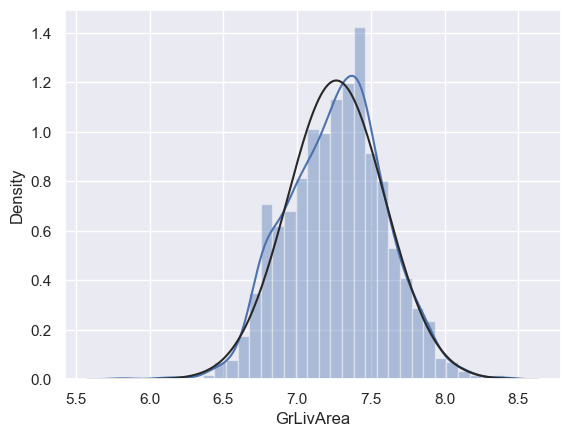

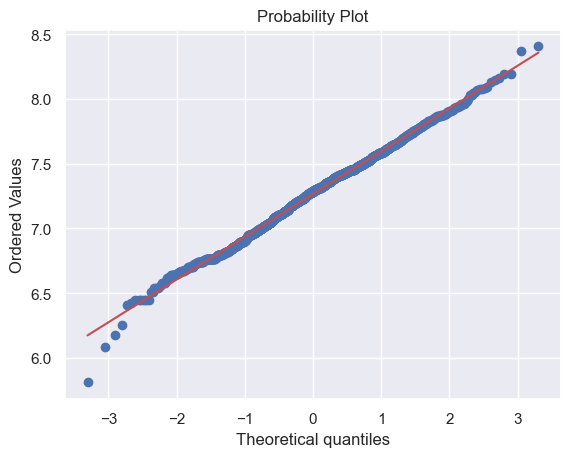

In [32]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

The log transformation has improved the normality of the distribution of GrLivArea.

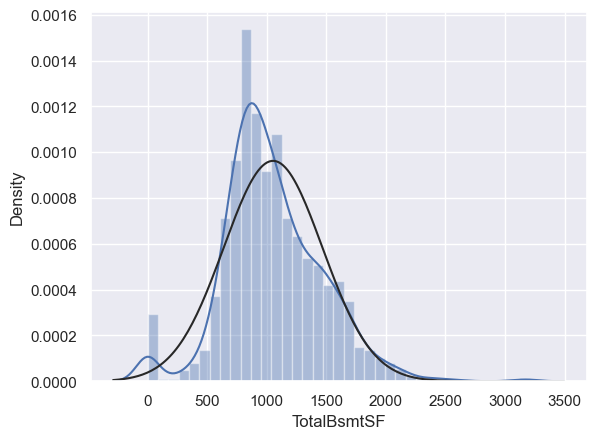

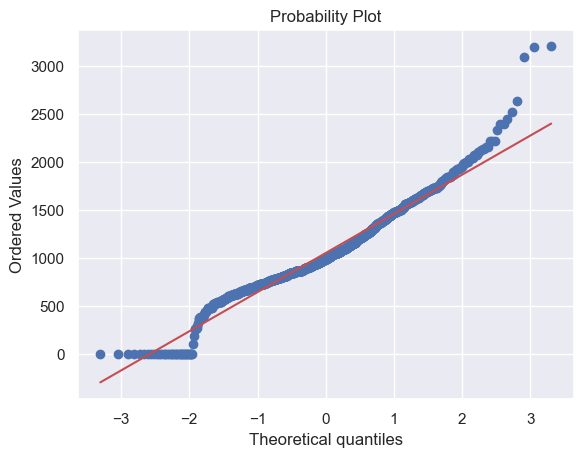

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)



Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.



In [34]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

#print(df_train['TotalBsmtSF'][:10])
#print(df_train['HasBsmt'][:10])

In [35]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

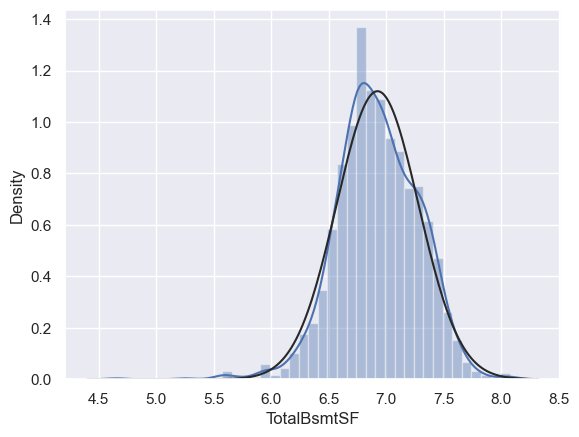

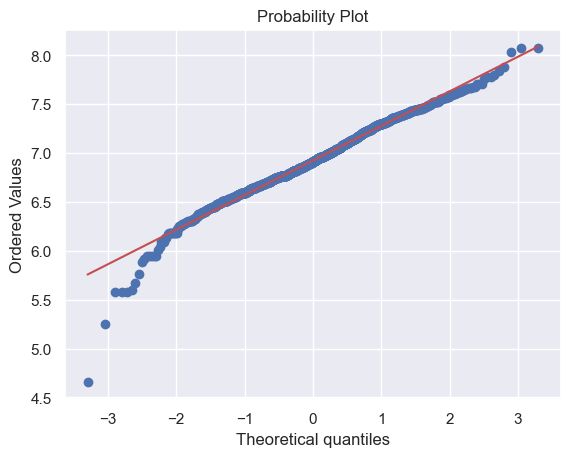

In [36]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

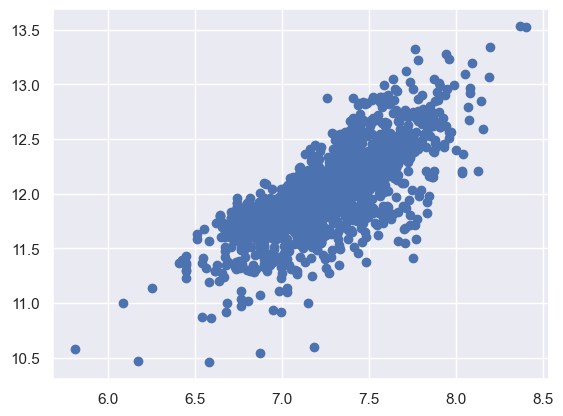

In [37]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).
The current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.


Now let's check 'SalePrice' with 'TotalBsmtSF'.

In the given code, the x-axis represents the 'GrLivArea' column of the 'df_train' dataframe, and the y-axis represents the 'SalePrice' column of the same dataframe.

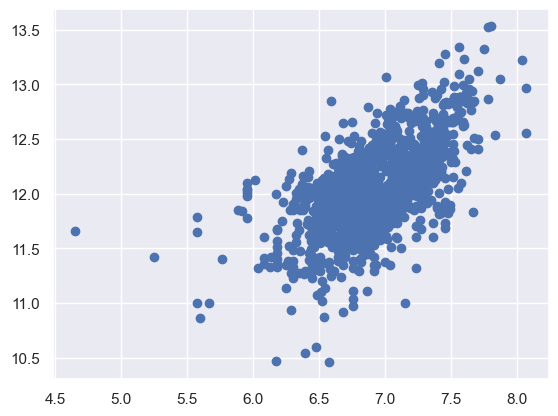

In [38]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF.




Last but not the least, dummy variables!!!

This code line is performing one-hot encoding on the categorical variables in the dataset, creating a new binary column for each possible category of each categorical variable. The resulting dataset will have more columns, with binary values, that can be used as input to machine learning algorithms that cannot handle categorical variables directly.

In [39]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

These lines of code define the feature variables (X) and the target variable (y). The feature variables are all the variables except for the target variable SalePrice, which is assigned to y. This is a typical setup for machine learning models, where we use the features to predict the target variable

CREATING ALGORITHMS:

In [42]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from random import sample
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [43]:
from sklearn.model_selection import train_test_split
#Splitting data
XL, XT, YL, YT = train_test_split(X, y, test_size=0.3, random_state=20, shuffle =True)
XL = XL.to_numpy()
XT = XT.to_numpy()
YL = YL.to_numpy()
YT = YT.to_numpy()

In [44]:
#NORMALAZING OF THE DATA
scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

Algorithm: Kernel Ridge Regression

First step: chosing the best hyperparameters

In [45]:
grid = {'alpha'   : np.logspace(-4,3,5),
        'kernel'  : ['rbf'],
        'gamma'   : np.logspace(-4,3,5)}

CV = GridSearchCV(estimator   = KernelRidge(),
                  param_grid  = grid,
                  scoring     = 'neg_mean_absolute_error',
                  cv          = 10,
                  verbose     = 0)
H = CV.fit(XL,YL)

Second step: learning the model with the best hyperparameters

In [46]:
ALG = KernelRidge(alpha   = H.best_params_['alpha'],
                  kernel  = H.best_params_['kernel'],
                  gamma   = H.best_params_['gamma'])
print(H.best_params_['alpha'])

M = ALG.fit(XL,YL)

0.005623413251903491


Third step: estimate the model for the test data

In [47]:
YP = M.predict(XT)

Fourth step: check the quality (error/performances) of our model

Model error:  0.08075332565345261


Text(0, 0.5, 'PREDICTED')

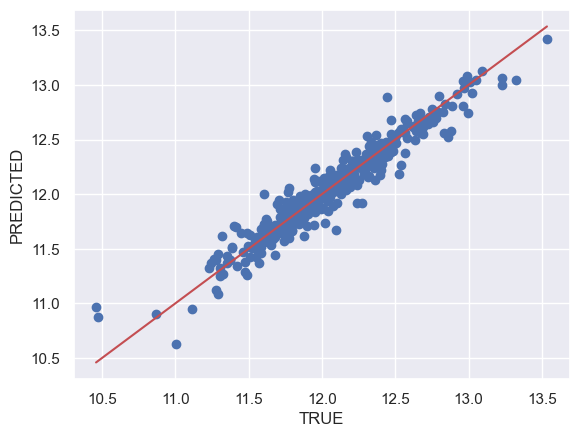

In [48]:
# Compute error
err = np.mean(np.abs(YT-YP))
print("Model error: ",err)

# Scatter Plot
fig, ax = plt.subplots()
ax.plot(YT,YP,'bo')
tmp = [np.min(YT),np.max(YT)]
ax.plot(tmp,tmp,'r')
plt.xlabel('TRUE')
plt.ylabel('PREDICTED')

We can conculde that our prediction is not perfect, but at least is good enough.

Algorithm: Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix

Model rmse:  0.112213034690954


Text(0, 0.5, 'PREDICTED')

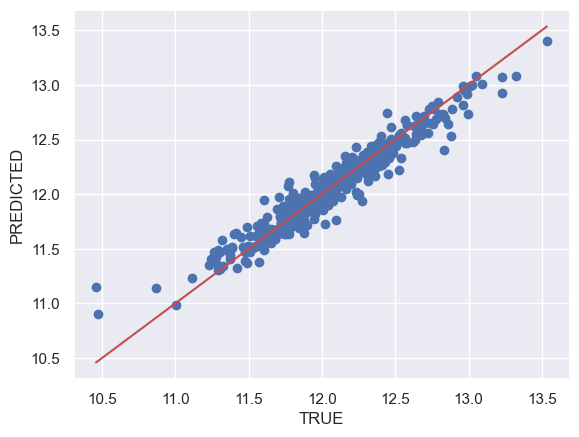

In [50]:
model_lasso = Lasso(alpha=0.001)

# fit the model
model_lasso.fit(XL, YL)

# predict on test data
YP = model_lasso.predict(XT)

# Compute rmse
rms = mean_squared_error(YT, YP, squared=False)
print("Model rmse: ",rms)

# Scatter Plot
plt.scatter(YT,YP)
tmp = [min(np.concatenate((YT,YP))),
       max(np.concatenate((YT,YP)))]
plt.plot(tmp,tmp,'r')
plt.xlabel('TRUE')
plt.ylabel('PREDICTED')
